In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ConsPensionContribModel import PensionContribConsumerType
from HARK.utilities import plot_funcs
from IPython import get_ipython

figures_path = '../Figures/'

In [2]:
agent = PensionContribConsumerType()


In [3]:
def plot_bilinear(function):
    x_list = function.x_list
    y_list = function.y_list
    f_vals = function.f_values

    plt.plot(x_list, f_vals)


In [4]:
agent.solve()


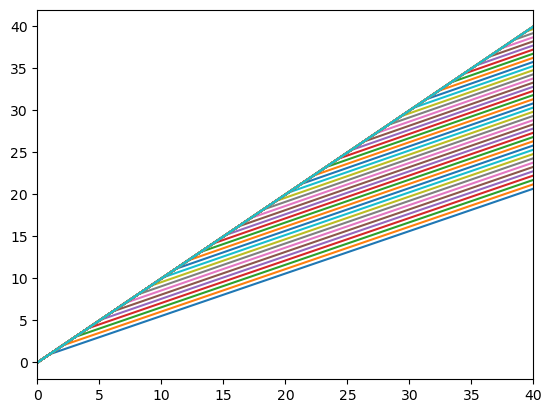

In [5]:
plot_funcs(agent.solution[0].consumption_stage.c_func.xInterpolators, 0, 40)


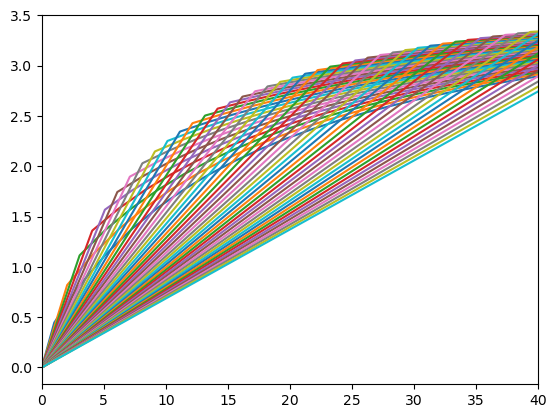

In [6]:
plot_funcs(
    agent.solution[0].consumption_stage.v_func.vFuncNvrs.xInterpolators, 0, 40)

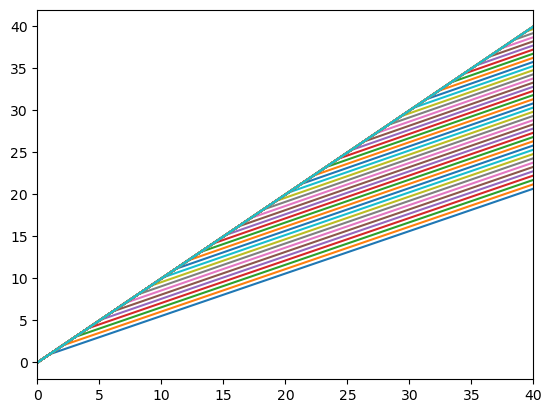

In [7]:
plot_funcs(
    agent.solution[0].consumption_stage.dvdl_func.cFunc.xInterpolators, 0, 40)

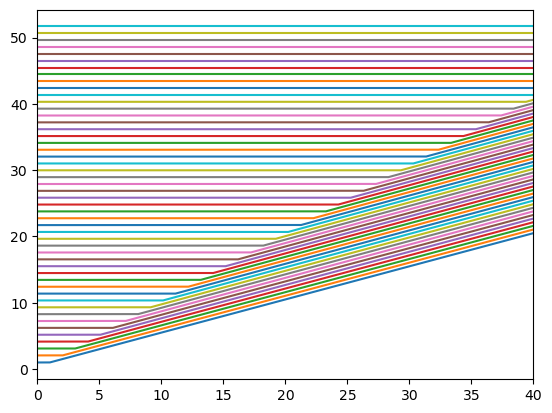

In [8]:
plot_funcs(
    agent.solution[0].consumption_stage.dvdb_func.cFunc.xInterpolators, 0, 40)

In [9]:
def plot_3d_func(func, min, max, n=100):
    # get_ipython().run_line_magic("matplotlib", "widget")
    xgrid = np.linspace(min, max, n)
    ygrid = xgrid

    xMat, yMat = np.meshgrid(xgrid, ygrid, indexing="ij")

    zMat = func(xMat, yMat)

    ax = plt.axes(projection="3d")
    ax.plot_surface(xMat, yMat, zMat, cmap="viridis")
    ax.set_title("surface")
    ax.set_xlabel("m")
    ax.set_ylabel("n")
    ax.set_zlabel("f")
    plt.show()


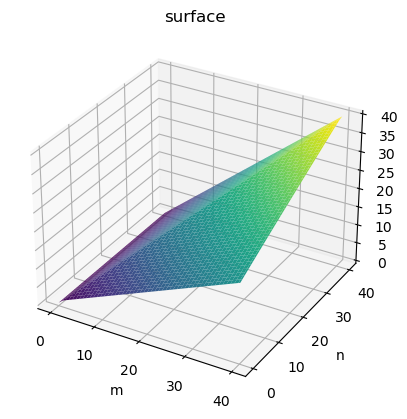

In [10]:
plot_3d_func(agent.solution[0].consumption_stage.c_func, 0, 40)


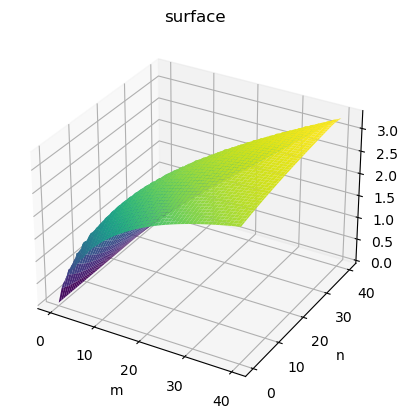

In [11]:
plot_3d_func(agent.solution[0].deposit_stage.v_func.vFuncNvrs, 0, 40)


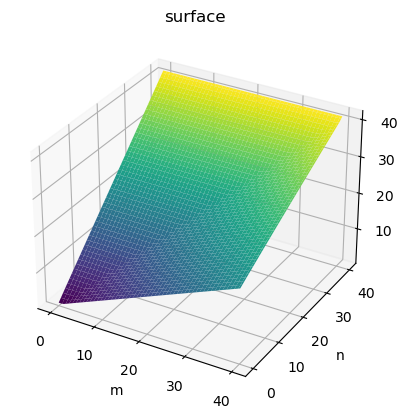

In [12]:
plot_3d_func(agent.solution[0].consumption_stage.dvdb_func.cFunc, 0, 40)


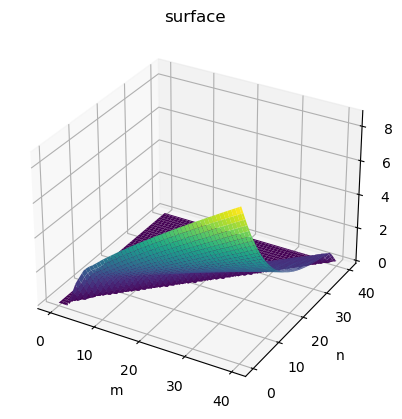

In [13]:
plot_3d_func(agent.solution[0].deposit_stage.d_func, 0, 40)


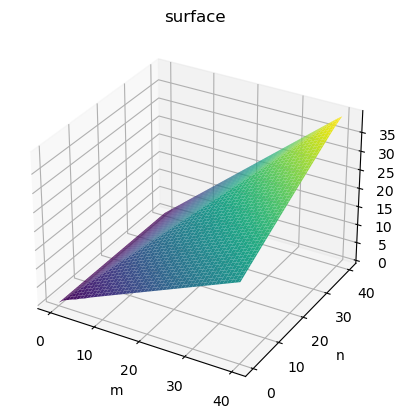

In [14]:
plot_3d_func(agent.solution[0].deposit_stage.c_func, 0, 40)


CPU times: total: 0 ns
Wall time: 0 ns


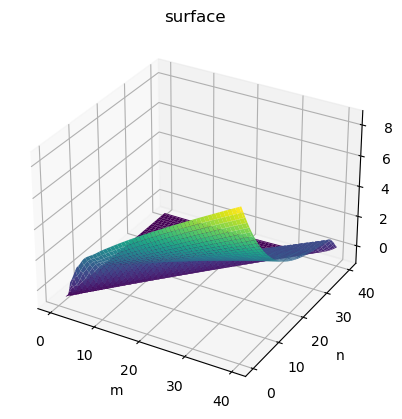

In [15]:
%time
plot_3d_func(agent.solution[0].deposit_stage.linear_interp, 0, 40)

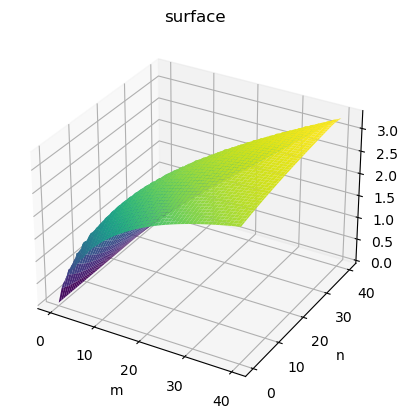

In [16]:
plot_3d_func(agent.solution[0].deposit_stage.v_func.vFuncNvrs, 0, 40)


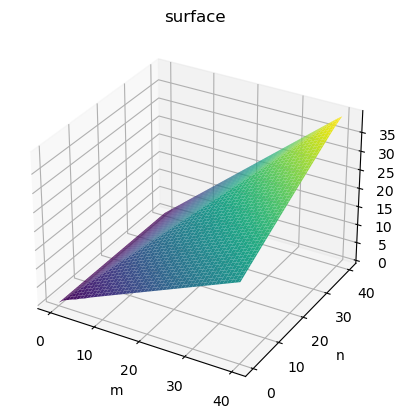

In [17]:
plot_3d_func(agent.solution[0].deposit_stage.dvdm_func.cFunc, 0, 40)


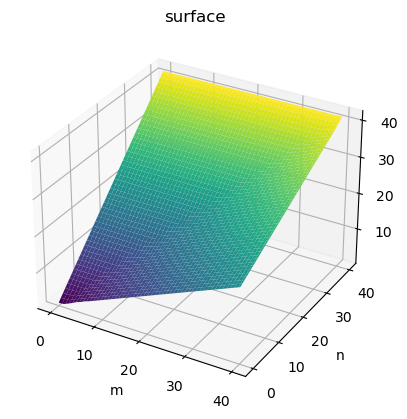

In [18]:
plot_3d_func(agent.solution[0].deposit_stage.dvdn_func.cFunc, 0, 40)


In [19]:
def scatter_hist(x, y, color, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    hist = ax.scatter(x, y, c=color, cmap="viridis", alpha=0.6)

    # now determine nice limits by hand:
    binwidth = 1.5
    xymax = max(np.max(x), np.max(y))
    xymin = min(np.min(x), np.min(y))
    top = (int(xymax / binwidth) + 1) * binwidth
    bottom = (int(xymin / binwidth) + 1) * binwidth

    bins = np.arange(bottom, top + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation="horizontal")

    return hist


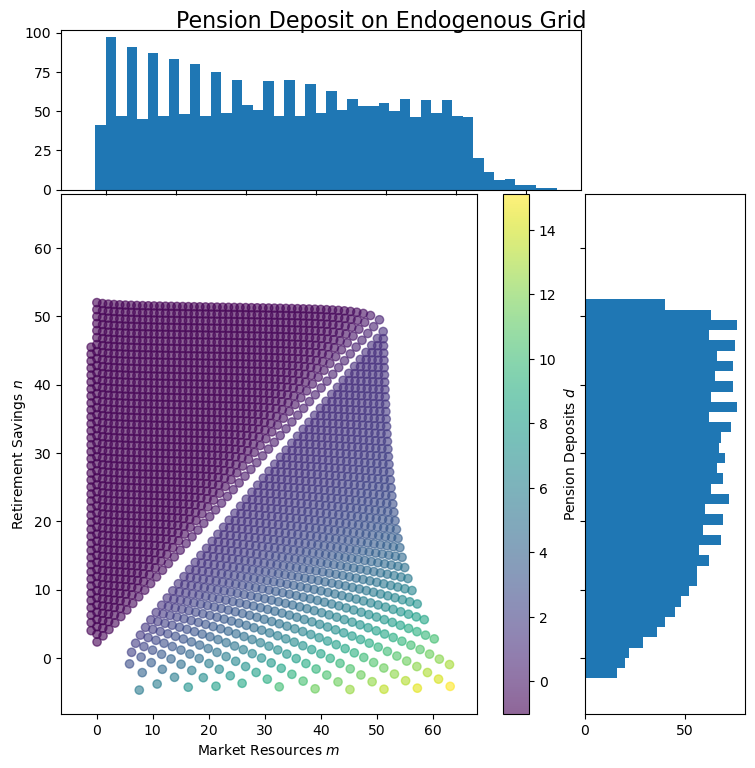

In [20]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

x = agent.solution[0].deposit_stage.linear_interp.points[:, 0]
y = agent.solution[0].deposit_stage.linear_interp.points[:, 1]
color = agent.solution[0].deposit_stage.linear_interp.values

# idx = np.logical_or(x < 0, y < 0)

# x = x[~idx]
# y = y[~idx]
# color = color[~idx]

# use the previously defined function
hist = scatter_hist(x, y, color, ax, ax_histx, ax_histy)
cbar = fig.colorbar(hist)
cbar.ax.set_ylabel("Pension Deposits $d$")

fig.suptitle("Pension Deposit on Endogenous Grid", fontsize=16)
ax.set_xlabel("Market Resources $m$")
ax.set_ylabel("Retirement Savings $n$")
plt.show()
fig.savefig(figures_path + "EndogenousGrid.pdf")

In [21]:
grids = agent.solution[0].consumption_stage.grids_before_cleanup


(-1.0, 50.0)

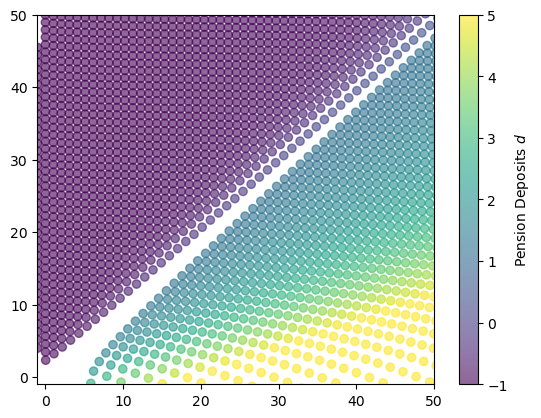

In [22]:
fig, ax = plt.subplots()
plot = ax.scatter(
    grids["mMat"],
    grids["nMat"],
    c=grids["dMat"],
    cmap="viridis",
    vmin=-1,
    vmax=5,
    plotnonfinite=True,
    alpha=0.6,
)
cbar = fig.colorbar(plot)
cbar.ax.set_ylabel("Pension Deposits $d$")


plt.xlim([-1, 50])
plt.ylim([-1, 50])


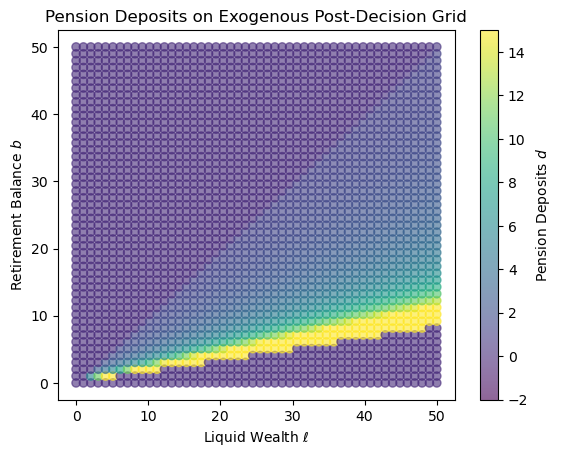

In [23]:
fig, ax = plt.subplots()
scatter = ax.scatter(
    grids["lMat"],
    grids["b2Mat"],
    c=np.maximum(grids["dMat"], 0),
    cmap="viridis",
    vmin=-2,
    vmax=15,
    plotnonfinite=True,
    alpha=0.6,
)
cbar = fig.colorbar(scatter)
cbar.ax.set_ylabel("Pension Deposits $d$")

plt.title("Pension Deposits on Exogenous Post-Decision Grid")
plt.xlabel(r"Liquid Wealth $\ell$")
plt.ylabel("Retirement Balance $b$")
fig.savefig(figures_path + "ExogenousGrid.pdf")


In [24]:
grids = agent.solution[0].consumption_stage.grids_before_cleanup

In [25]:
from HARK.interpolation._sklearn import GeneralizedRegressionUnstructuredInterp

In [26]:
gauss_interp = GeneralizedRegressionUnstructuredInterp(
    grids["dMat"],
    [grids["mMat"], grids["nMat"]],
    model="gaussian-process",
    std=True, 
    model_kwargs={"normalize_y": True}
)


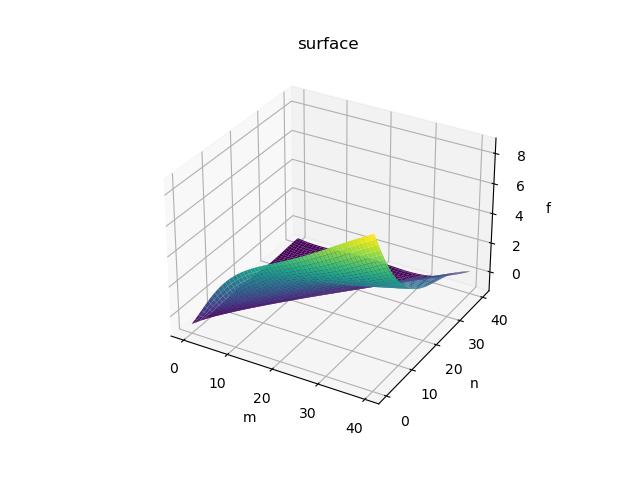

In [27]:
get_ipython().run_line_magic("matplotlib", "widget")
plot_3d_func(gauss_interp, 0, 40)

In [28]:
agent.solution

[PensionContribSolution(post_decision_stage=PostDecisionStage(v_func=<HARK.interpolation._hark.ValueFuncCRRA object at 0x0000020969910C10>, dvda_func=<HARK.interpolation._hark.MargValueFuncCRRA object at 0x0000020969910190>, dvdb_func=<HARK.interpolation._hark.MargValueFuncCRRA object at 0x00000209699120B0>), deposit_stage=DepositStage(d_func=<HARK.interpolation._econforge.LinearFast object at 0x000002096BA11F30>, v_func=<HARK.interpolation._hark.ValueFuncCRRA object at 0x000002096BA13A30>, dvdm_func=<HARK.interpolation._hark.MargValueFuncCRRA object at 0x000002096BA11C00>, dvdn_func=<HARK.interpolation._hark.MargValueFuncCRRA object at 0x000002096BA11F00>), consumption_stage=ConsumptionStage(c_func=<HARK.interpolation._hark.LinearInterpOnInterp1D object at 0x000002096B9FE9E0>, v_func=<HARK.interpolation._hark.ValueFuncCRRA object at 0x000002096BA107C0>, dvdl_func=<HARK.interpolation._hark.MargValueFuncCRRA object at 0x000002096B9FE800>, dvdb_func=<HARK.interpolation._hark.MargValueFun